## Import Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import talib

def generate_TAs_features(df):
    """
    Function to generate Technical Analysis features:
    - MA (Moving Average)
    - RSI (Relative Strength Index)
    - MFI (Money Flow Index)
    """
    res = df.copy()
    for i in [7, 14, 21]:
        # Moving Average
        res[f'{i} DAYS MA'] = talib.MA(res['Close'], timeperiod=i)
        res[f'{i} DAYS MA'] = res[f'{i} DAYS MA'].shift(1)
        
        # RSI (Relative Strength Index)
        res[f'RSI {i}'] = talib.RSI(res['Close'], timeperiod=i)
        
        # MFI (Money Flow Index)
        res[f'MFI {i}'] = talib.MFI(res['High'], res['Low'], res['Close'], res['Volume'], timeperiod=i)
        
        # Standard Deviation
        if i == 7:
            res[f'{i} DAYS STD DEV'] = res['Close'].rolling(i).std()
            res[f'{i} DAYS STD DEV'] = res[f'{i} DAYS STD DEV'].shift(1)
    
    print(res.isnull().sum())
    res = res[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',            
               '7 DAYS MA', '14 DAYS MA', '21 DAYS MA', '7 DAYS STD DEV',
               'RSI 7', 'RSI 14', 'RSI 21',            
               'MFI 7', 'MFI 14', 'MFI 21']]
    res = res.dropna()
    return res

def generate_date_related_features(df):
    """
    Function to generate date related features
    """
    res = df.copy()
    res['dayofweek'] = df.index.dayofweek
    res['quarter'] = df.index.quarter
    res['month'] = df.index.month
    res['year'] = df.index.year
    res['dayofyear'] = df.index.dayofyear
    res['dayofmonth'] = df.index.day
    res['weekofyear'] = df.index.isocalendar().week
    return res

In [3]:
import yfinance as yf

In [4]:
df = yf.download('EXCL.JK', start='2012-09-18', end='2022-09-18')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-09-18,6510.179199,6559.498535,6411.540039,6510.179199,5995.036621,2324636
2012-09-19,6559.498535,6658.137695,6411.540039,6559.498535,6040.454102,3981180
2012-09-20,6559.498535,6707.457031,6460.859375,6559.498535,6040.454102,3382533
2012-09-21,6559.498535,6658.137695,6510.179199,6559.498535,6040.454102,2287632
2012-09-24,6460.859375,6559.498535,6460.859375,6460.859375,5949.619629,2953697


In [5]:
df.index = pd.to_datetime(df.index)

## Feature Extraction

In [6]:
df2 = generate_TAs_features(df)
df2.head()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
7 DAYS MA          7
RSI 7              7
MFI 7              7
7 DAYS STD DEV     7
14 DAYS MA        14
RSI 14            14
MFI 14            14
21 DAYS MA        21
RSI 21            21
MFI 21            21
dtype: int64


,Open,High,Low,Close,Adj Close,Volume,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21
Date,,,,,,,,,,,,,,,,
2012-10-17,7102.013672,7102.013672,6904.735352,7102.013672,6540.040527,2398643,6756.776786,6714.502895,6653.440592,145.192691,77.044185,68.428645,64.999999,58.182052,63.827072,65.780552
2012-10-18,7102.013672,7200.652832,6954.054688,7102.013672,6540.040527,1710275,6813.142020,6756.776786,6681.623186,191.921120,77.044185,68.428645,64.999999,69.065289,61.462381,64.831162
2012-10-19,7200.652832,7299.291504,7102.013672,7200.652832,6630.874512,4236150,6883.598493,6795.527867,6707.457241,194.915438,80.898958,70.953332,66.828575,83.057397,62.715395,65.400320
2012-10-22,7003.374512,7249.972168,6855.416016,7003.374512,6449.206543,16350011,6968.146275,6837.801758,6737.988398,183.908133,58.124725,60.528094,60.221409,48.151289,49.940648,52.221015
2012-10-23,6904.735352,7052.693848,6904.735352,6904.735352,6358.372559,2047869,7017.465820,6869.507185,6759.125349,123.181434,49.926031,56.090409,57.249835,38.915349,45.632639,52.647068


In [7]:
df3 = generate_date_related_features(df2)
df3.head()

,Open,High,Low,Close,Adj Close,Volume,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,...,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-17,7102.013672,7102.013672,6904.735352,7102.013672,6540.040527,2398643,6756.776786,6714.502895,6653.440592,145.192691,...,58.182052,63.827072,65.780552,2,4,10,2012,291,17,42
2012-10-18,7102.013672,7200.652832,6954.054688,7102.013672,6540.040527,1710275,6813.142020,6756.776786,6681.623186,191.921120,...,69.065289,61.462381,64.831162,3,4,10,2012,292,18,42
2012-10-19,7200.652832,7299.291504,7102.013672,7200.652832,6630.874512,4236150,6883.598493,6795.527867,6707.457241,194.915438,...,83.057397,62.715395,65.400320,4,4,10,2012,293,19,42
2012-10-22,7003.374512,7249.972168,6855.416016,7003.374512,6449.206543,16350011,6968.146275,6837.801758,6737.988398,183.908133,...,48.151289,49.940648,52.221015,0,4,10,2012,296,22,43
2012-10-23,6904.735352,7052.693848,6904.735352,6904.735352,6358.372559,2047869,7017.465820,6869.507185,6759.125349,123.181434,...,38.915349,45.632639,52.647068,1,4,10,2012,297,23,43


In [8]:
df4 = df3.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df4.head()

,Close,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,,
2012-10-17,7102.013672,6756.776786,6714.502895,6653.440592,145.192691,77.044185,68.428645,64.999999,58.182052,63.827072,65.780552,2,4,10,2012,291,17,42
2012-10-18,7102.013672,6813.142020,6756.776786,6681.623186,191.921120,77.044185,68.428645,64.999999,69.065289,61.462381,64.831162,3,4,10,2012,292,18,42
2012-10-19,7200.652832,6883.598493,6795.527867,6707.457241,194.915438,80.898958,70.953332,66.828575,83.057397,62.715395,65.400320,4,4,10,2012,293,19,42
2012-10-22,7003.374512,6968.146275,6837.801758,6737.988398,183.908133,58.124725,60.528094,60.221409,48.151289,49.940648,52.221015,0,4,10,2012,296,22,43
2012-10-23,6904.735352,7017.465820,6869.507185,6759.125349,123.181434,49.926031,56.090409,57.249835,38.915349,45.632639,52.647068,1,4,10,2012,297,23,43


In [9]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2459 entries, 2012-10-17 to 2022-09-16
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           2459 non-null   float64
 1   7 DAYS MA       2459 non-null   float64
 2   14 DAYS MA      2459 non-null   float64
 3   21 DAYS MA      2459 non-null   float64
 4   7 DAYS STD DEV  2459 non-null   float64
 5   RSI 7           2459 non-null   float64
 6   RSI 14          2459 non-null   float64
 7   RSI 21          2459 non-null   float64
 8   MFI 7           2459 non-null   float64
 9   MFI 14          2459 non-null   float64
 10  MFI 21          2459 non-null   float64
 11  dayofweek       2459 non-null   int64  
 12  quarter         2459 non-null   int64  
 13  month           2459 non-null   int64  
 14  year            2459 non-null   int64  
 15  dayofyear       2459 non-null   int64  
 16  dayofmonth      2459 non-null   int64  
 17  weekofyear     

In [10]:
df4['Close_'] = df4['Close']
df4 = df4.drop(['Close'], axis=1)
df4 = df4.rename(columns={'Close_': 'Close'})
df4.head()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-17,6756.776786,6714.502895,6653.440592,145.192691,77.044185,68.428645,64.999999,58.182052,63.827072,65.780552,2,4,10,2012,291,17,42,7102.013672
2012-10-18,6813.142020,6756.776786,6681.623186,191.921120,77.044185,68.428645,64.999999,69.065289,61.462381,64.831162,3,4,10,2012,292,18,42,7102.013672
2012-10-19,6883.598493,6795.527867,6707.457241,194.915438,80.898958,70.953332,66.828575,83.057397,62.715395,65.400320,4,4,10,2012,293,19,42,7200.652832
2012-10-22,6968.146275,6837.801758,6737.988398,183.908133,58.124725,60.528094,60.221409,48.151289,49.940648,52.221015,0,4,10,2012,296,22,43,7003.374512
2012-10-23,7017.465820,6869.507185,6759.125349,123.181434,49.926031,56.090409,57.249835,38.915349,45.632639,52.647068,1,4,10,2012,297,23,43,6904.735352


## Data Standardization

In [11]:
scaled_df = df4.copy()

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
features_scaler = StandardScaler()
features = scaled_df.columns[:-1]
scaled_df[features] = features_scaler.fit_transform(scaled_df[features])

In [14]:
close_scaler = StandardScaler()
scaled_df['Close'] = close_scaler.fit_transform(np.array(scaled_df['Close']).reshape(-1,1))

In [15]:
scaled_df.head()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-17,3.059533,3.007273,2.938809,1.053684,1.761675,1.705354,1.715120,0.324503,0.722584,0.996105,0.008923,1.34241,1.016593,-1.845348,1.033444,0.147246,1.030312,3.395286
2012-10-18,3.111350,3.046031,2.964583,1.915311,1.761675,1.705354,1.715120,0.787275,0.583963,0.928232,0.716706,1.34241,1.016593,-1.845348,1.042927,0.261864,1.030312,3.395286
2012-10-19,3.176120,3.081559,2.988210,1.970523,1.998807,1.924055,1.909460,1.382241,0.657416,0.968922,1.424489,1.34241,1.016593,-1.845348,1.052410,0.376483,1.030312,3.486288
2012-10-22,3.253845,3.120318,3.016132,1.767559,0.597816,1.020966,1.207254,-0.102020,-0.091455,0.026726,-1.406643,1.34241,1.016593,-1.845348,1.080859,0.720337,1.096678,3.304284
2012-10-23,3.299184,3.149386,3.035463,0.647818,0.093460,0.636550,0.891438,-0.494746,-0.343995,0.057185,-0.698860,1.34241,1.016593,-1.845348,1.090342,0.834955,1.096678,3.213282


## Save Files

### Save scalers

In [16]:
from joblib import dump, load

In [17]:
dump(features_scaler, 'excl_features_scaler.bin', compress=True)

['excl_features_scaler.bin']

In [18]:
dump(close_scaler, 'excl_close_scaler.bin', compress=True)

['excl_close_scaler.bin']

In [19]:
test_loaded_sc = load('excl_close_scaler.bin')
test_loaded_sc.inverse_transform(np.array(scaled_df['Close']).reshape(-1,1))[0]

array([7102.01367188])

### Save .csv file

In [20]:
scaled_df.to_csv('../cleaned_data/EXCL.csv')

## EDA

In [21]:
import seaborn as sns
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


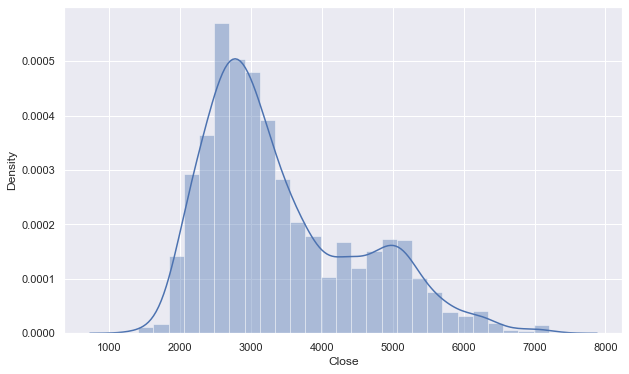

In [22]:
plt.figure(figsize=(10,6))
sns.distplot(df4['Close'])
plt.show()

In [23]:
# Correlation Coefficient
def plot_corr_coef(corr_data):
    mask = np.array(corr_data)
    mask[np.tril_indices_from(mask)] = False

    # create appropriate canvas
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)

    sns.heatmap(corr_data, mask=mask, vmax=.8, square=True, annot=True, ax = ax)

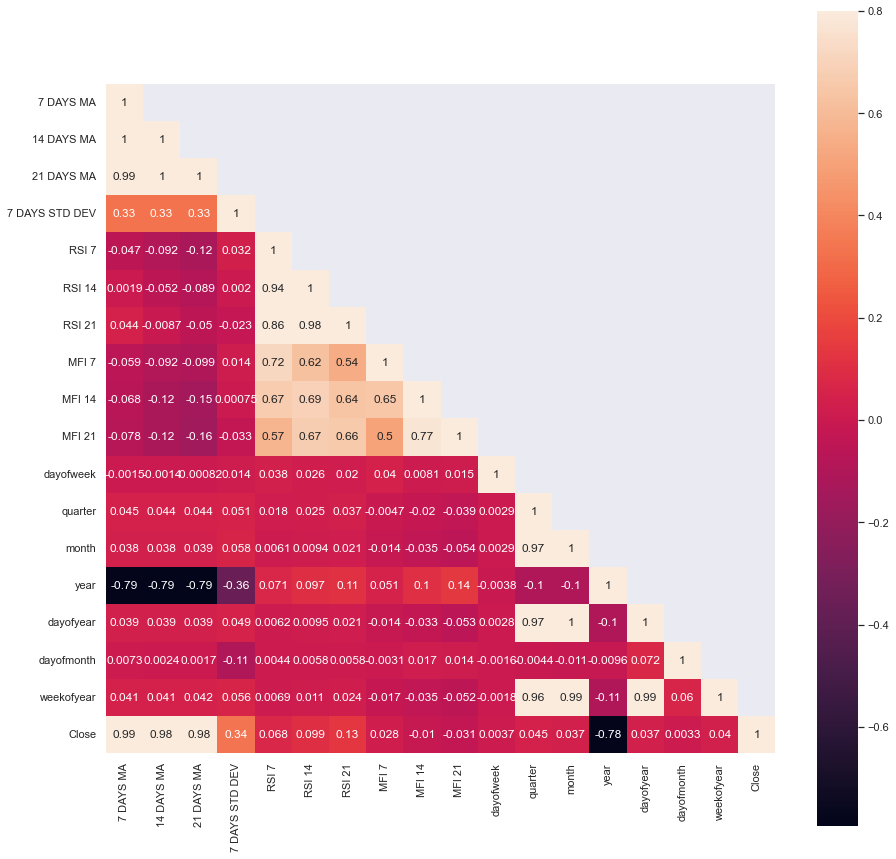

In [24]:
corr_data = scaled_df.corr()
plot_corr_coef(corr_data)

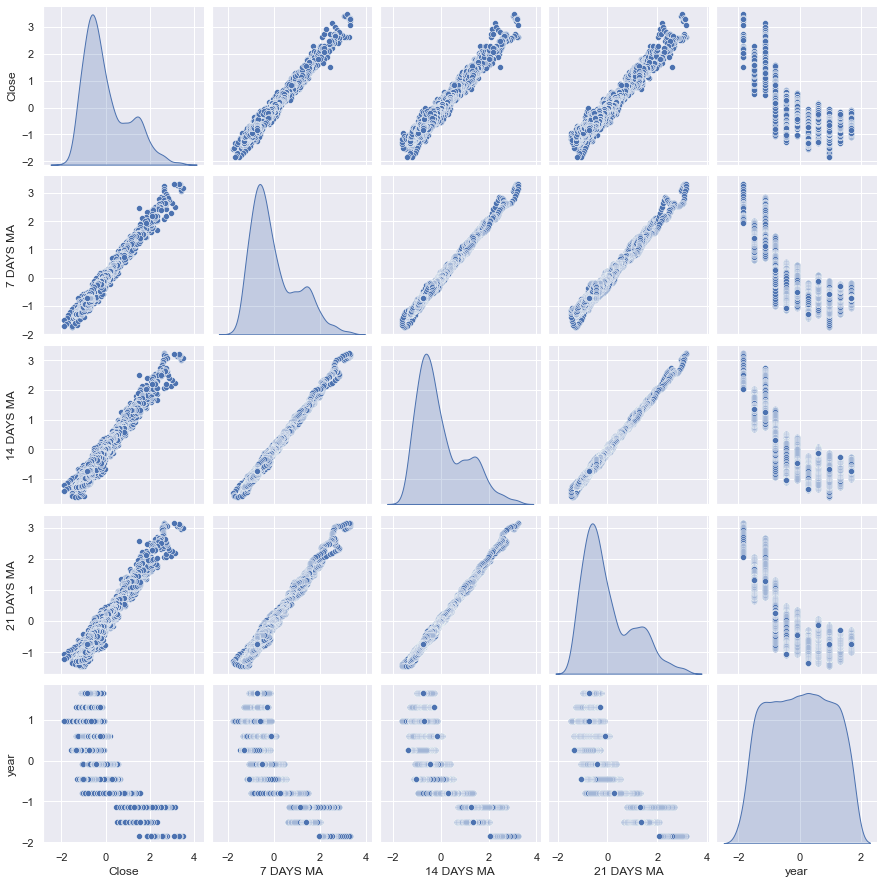

In [25]:
sns.pairplot(scaled_df[['Close', '7 DAYS MA', '14 DAYS MA', '21 DAYS MA', 'year']], diag_kind='kde')
plt.show()